In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [3]:
df

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910
...,...,...,...,...,...
5038,CHEMBL4554172,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4cccc(F)c4)CC3)sc2-...,10000.0,10000.0,5.000000
5039,CHEMBL4533844,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4ccccc4C(F)(F)F)CC3...,7570.0,7570.0,5.120904
5040,CHEMBL4570655,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4ccccc4C)CC3)sc2-c2...,10000.0,10000.0,5.000000
5041,CHEMBL4571704,COc1cc(O)c2c(c1)C1=C(c3c(O)c(O)cc(C)c3-c3cc(OC...,15500.0,15500.0,4.809668


# Analisis

In [4]:
df['canonical_len'] = df['canonical_smiles'].apply(lambda x: len(x))

<AxesSubplot:>

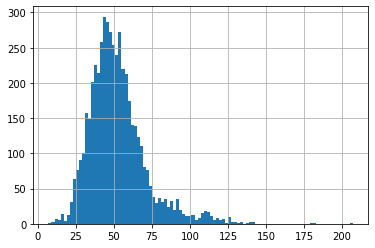

In [5]:
df['canonical_len'].hist(bins=100)

In [6]:
max_sequence_len = df['canonical_len'].max()
max_sequence_len

207

In [7]:
max_len_idx = df['canonical_len'].argmax()
min_len_idx = df['canonical_len'].argmin()

In [8]:
df.iloc[max_len_idx].canonical_smiles

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

In [9]:
df.iloc[min_len_idx].canonical_smiles

'NC(=O)O'

In [10]:
from pysmiles import read_smiles

In [11]:
ch_net = read_smiles(df.iloc[max_len_idx].canonical_smiles)

Atom "[C@@]" contains stereochemical information that will be discarded.
Atom "[C@H]" contains stereochemical information that will be discarded.
Atom "[C@]" contains stereochemical information that will be discarded.
Atom "[C@@]" contains stereochemical information that will be discarded.
Atom "[C@]" contains stereochemical information that will be discarded.
Atom "[C@]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@@]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@@]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@@]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information 

In [12]:
ch_net.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78))

In [13]:
from collections import Counter

In [14]:
text = ''
for cs in df['canonical_smiles']:
    text = text + cs

In [15]:
vocab_hist = dict(Counter(text))

In [16]:
vocab_hist

{'C': 56150,
 'O': 12122,
 'c': 64065,
 '1': 14750,
 'n': 3932,
 '(': 20907,
 '-': 1808,
 '2': 11730,
 '3': 7073,
 ')': 20907,
 '=': 7661,
 'o': 712,
 'N': 9143,
 'l': 1444,
 'S': 536,
 'F': 1023,
 '[': 5400,
 '@': 4124,
 'H': 2208,
 ']': 5400,
 '/': 1544,
 '\\': 338,
 '+': 1158,
 '.': 1207,
 'B': 564,
 'r': 540,
 '4': 3026,
 '#': 331,
 'I': 101,
 's': 211,
 '5': 854,
 '6': 224,
 'P': 34,
 'a': 1,
 '7': 18,
 '8': 6,
 'e': 35,
 'i': 2}

In [17]:
X = df['canonical_smiles']
y = df['pIC50']
len(X)

5043